<h1> Modelos Computacionales I.
<h2> Unidad de probabilidad y estadística. 
<h3> Práctica 2. Ejercicios 6 y 7. Carolina Bernal Rodríguez.

<h3> Ejercicio 6. </h3>

Utilizando las diez neuronas de S1 empleadas en el ejercicio 2 vamos
a calcular la tasa de disparo durante los periodos de estimulación para cada ensayo,
tomando una ventana de 1 segundo que cubra todo el primer estímulo (0 a 1s de la
tarea) o todo el segundo estímulo (de 3 a 4s de la tarea). Con todos los ensayos (k=60)
en ambos casos (primer y segundo estímulo), calcular el z-score de cada ensayo.

(a) Toma los z-score calculados durante el primer estímulo. Separa los ensayos basados
en la identidad del primer estímulo (clase 1 y clase 2 juntas por ser estímulo
agrupado; clase 3 y clase 4 juntas por ser estímulo extendido). Calcula la distribución
de probabilidad condicionada de los z-score dada la identidad del primer estímulo
i.e p(z|s = A) y p(z|s = E). Cada neurona tiene 30 ensayos para cada estímulo por
lo que, juntando las diez, tendrás 300 z-scores para crear las distribuciones.

(b) Repetir el procedimiento anterior con las ventanas calculadas en el segundo
estímulo. Calcular la probabilidad condicionada a la identidad del segundo estímulo.
Juntar la clase 1 con la clase 3 y la clase 2 con la 4.

(c) Comparar las dos distribuciones del punto (a) con las dos del punto (b).

In [1]:
import csv
import numpy as np 
from matplotlib import pyplot as plt 
from matplotlib import style
from io import StringIO
import copy
import seaborn as sns

# Librería creada para la lectura de archivos y el cálculo de tasa disparo optimizada 
# ==============================================================================
import Caro_lectura_archivo as lectArchivo
import Caro_tasa_disparo_optimizada  as Cdisparo

In [2]:
#Ajustes para la estética de las gráficas 
plt.rcParams['savefig.bbox'] = "tight"
style.use('seaborn-whitegrid') or plt.style.use('seaborn-whitegrid')

In [3]:
#Ajustes para la estética de las gráficas
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [4]:
#Utilizando el módulo de lectura de archivo , leemos los .csv y regresamos los índices de los renglones vacíos 
#y un arreglo que contiene los renglones del archivo .csv 
vacios_0,neu_s1_0 = lectArchivo.lectura_archivo('Practica1_Estadistica/TiemposNeuS1.csv')
vacios_a,neu_s1a = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1A.csv')
vacios_b,neu_s1b = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1B.csv')
vacios_c,neu_s1c = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1C.csv')
vacios_d,neu_s1d = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1D.csv')
vacios_e,neu_s1e = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1E.csv')
vacios_f,neu_s1f = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1F.csv')
vacios_g,neu_s1g = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1G.csv')
vacios_h,neu_s1h = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1H.csv')
vacios_i,neu_s1i = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1I.csv')

In [5]:
#Separamos los dos estímulos que se encuentran en los rangos de 0->1 y de 3->4
def Separa_estimulos(espiga,num_estimulo):
    neurona = copy.deepcopy(espiga)
    
    for k in range(len(neurona)):# 10 neuronas
        for i in range(len(neurona[k])): 
            for j in range(len(neurona[k][i])): #recorre cada condición de cada ensayo 
             
                if num_estimulo == 1:  #Se selecciona si se trata del primer o segundo estímulo 
                    neurona[k][i][j]=list(filter(lambda x: x>=0 and x<=1, neurona[k][i][j]))
                elif num_estimulo == 2:
                    neurona[k][i][j]=list(filter(lambda x: x>=3 and x<=4, neurona[k][i][j])) #utilizamos fun anon. lambda
                    
            neurona[k][i]=np.array(neurona[k][i])
    
    return neurona

In [6]:
#El conjunto de datos se separa en cada clase y se almacena en un arreglo
def separar_por_clase(data):
    clase1 = np.array(data[0:15], dtype='object')
    clase2 = np.array(data[15:30], dtype='object')
    clase3 = np.array(data[30:45], dtype='object')
    clase4 = np.array(data[45:60], dtype='object')
    Espigas = np.vstack((clase1,clase2,clase3,clase4))
    return Espigas

In [7]:
neu_s1_0 = separar_por_clase(neu_s1_0)
neu_s1a = separar_por_clase(neu_s1a)
neu_s1b = separar_por_clase(neu_s1b)
neu_s1c = separar_por_clase(neu_s1c)
neu_s1d = separar_por_clase(neu_s1d)
neu_s1e = separar_por_clase(neu_s1e)
neu_s1f = separar_por_clase(neu_s1f)
neu_s1g = separar_por_clase(neu_s1g)
neu_s1h = separar_por_clase(neu_s1h)
neu_s1i = separar_por_clase(neu_s1i)

In [8]:
Espigas_10neu = [neu_s1_0,neu_s1a,neu_s1b,neu_s1c,neu_s1d,neu_s1e,neu_s1f,neu_s1g,neu_s1h,neu_s1i]

In [9]:
neu_s1_est01 = Separa_estimulos(Espigas_10neu,num_estimulo = 1) #Del 1er estímulo
neu_s1_est02 = Separa_estimulos(Espigas_10neu,num_estimulo = 2) #Del 2do estímulo 

In [10]:
def Tasa_por_estimulo(espigas): #tasas de disparo y Z-score de los estímulos 
    tot_ensayos = 60
    Z_score = [] #lista vacia para guardar las tasas de cada neurona
    Tasa_disp = []
    
    for i in range(len(espigas)): #recore a c/u de las 10 neuronas 
        
        espigas[i] = espigas[i].reshape(tot_ensayos,) #acomodamos de acuerdo al num de ensayos 
        #Matrices vacías que almacenan la tasa de disparo y z-score
        Tasa = np.empty((tot_ensayos,),dtype = float)
        Z = np.empty((tot_ensayos,),dtype = float) 
        
        for j in range(len(espigas[i])): # ciclo de los 60 ensayos 
            
            espigas[i][j] = np.array([espigas[i][j]])  #matriz de espigas
            x,y = np.shape(espigas[i][j]) 
            espigas[i][j]=espigas[i][j].reshape(y,) #reacomodar  los valores
            Tasa[j]=float(len(espigas[i][j])) #cálculo de tasa de disparo 
        
        Tasa_disp.append(Tasa) 
        
        for k in range(len(espigas[i])): 
            
            Z[k]=(Tasa_disp[i][k] - np.mean(Tasa_disp[i])) / np.std(Tasa_disp[i]) #calculo de z_score 
        Z_score.append(Z)
        
    return Z_score


In [11]:
Zs_1 = Tasa_por_estimulo(neu_s1_est01)
Zs_2 = Tasa_por_estimulo(neu_s1_est02)

In [12]:
#Histograma : distribución de probabilidad condicionada de los z-score 
#Al ser todos los datos de Tiempos sabemos que hay 60 ensayos totales, 15 ensayos repartidos en 4 clases 

def Histograma_Estimulo_Agrupado(Zs,case,tit,colores,nombre):
    
    clase1 = np.empty((150,),dtype=float) #Almacena ensayos de cada clase, son 15 ensayos y 10 neuronas
    clase2 = np.empty((150,),dtype=float) 
    clase3 = np.empty((150,),dtype=float)
    clase4 = np.empty((150,),dtype=float)
    
    cont = 0 #Inicializar 1er contador 
    cont2 = 15 #Inicializar 2do contador 
    
    for i in range(len(Zs)):
        
        clase1[cont:cont+15] = Zs[i][cont2-15:cont2]    #primeros 15 elementos de la 1era condición 
        clase2[cont:cont+15] = Zs[i][cont2:cont2+15]    #segunda clase (15-30) de la segunda condición
        clase3[cont:cont+15] = Zs[i][cont2*2:(cont2*2)+15]
        clase4[cont:cont+15] = Zs[i][cont2*3:(cont2*3)+15]
        cont=cont+15  #Actualizamos el contador 
        
    if case==1:
        estimulo=np.hstack([clase1,clase2])#agrupados del s1
    elif case==2:
        estimulo=np.hstack([clase3,clase4])#extendidos del s1
    elif case==3:
        estimulo=np.hstack([clase1,clase3])#agrupados del s2
    elif case==4:
        estimulo=np.hstack([clase2,clase4])#extendidos del s2
  
    #Graficar el histograma
    x,bins=np.histogram(estimulo,bins=10)
    frec = x / len(estimulo)
    fig=plt.figure(figsize=(12,9))
    plt.bar(bins[:-1],frec,width= np.diff(bins),ec="k",color=colores)
    plt.title(tit+'de las 10 neuronas S1',fontsize=20,fontweight="bold")
    plt.ylabel("Frec Rel / Proba",fontsize=18)
    plt.xlabel("Z-score",fontsize=18)
    plt.savefig(nombre)
    plt.show()


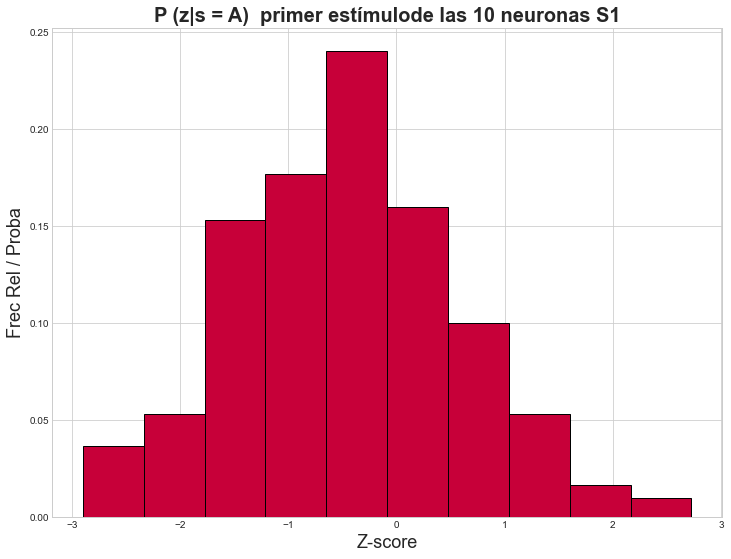

In [13]:
Histograma_Estimulo_Agrupado(Zs_1,case=1,tit="P (z|s = A)  primer estímulo",colores="#C70039",nombre='z_score_primer_agrupado')

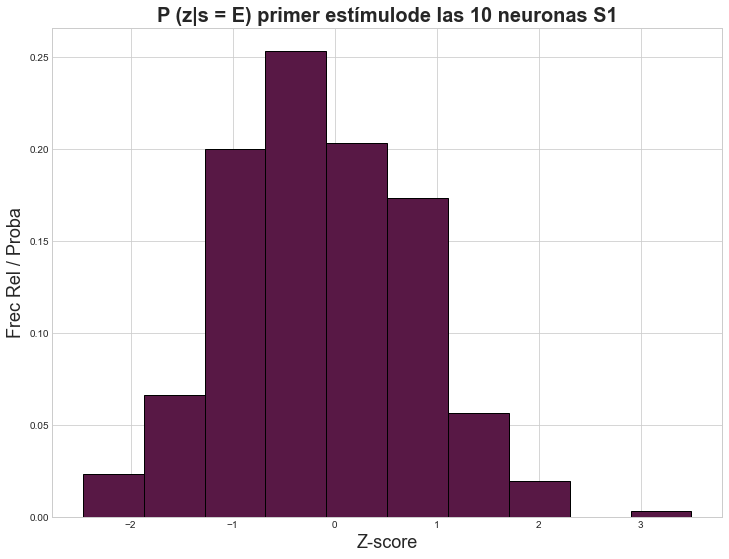

In [14]:
Histograma_Estimulo_Agrupado(Zs_1,case=2,tit="P (z|s = E) primer estímulo",colores="#581845",nombre='z_score_primer_extendido')

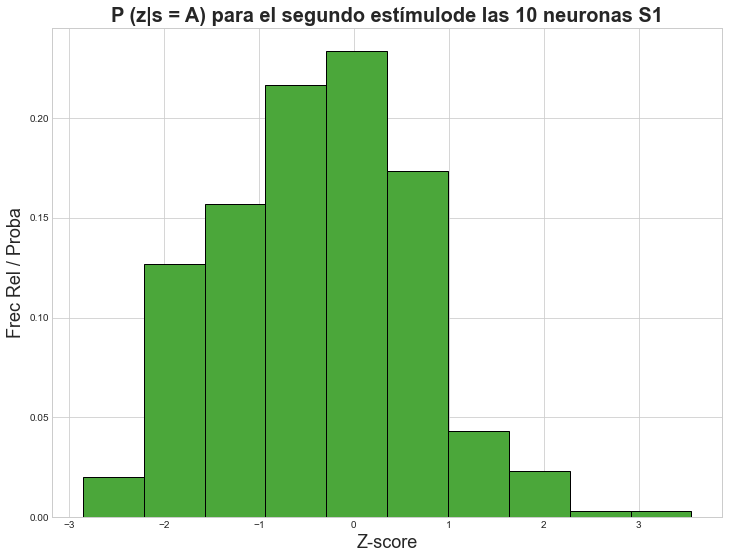

In [15]:
Histograma_Estimulo_Agrupado(Zs_2,case=3,tit="P (z|s = A) para el segundo estímulo",colores="#4ba73a",nombre='z_score_seg_agrupado')

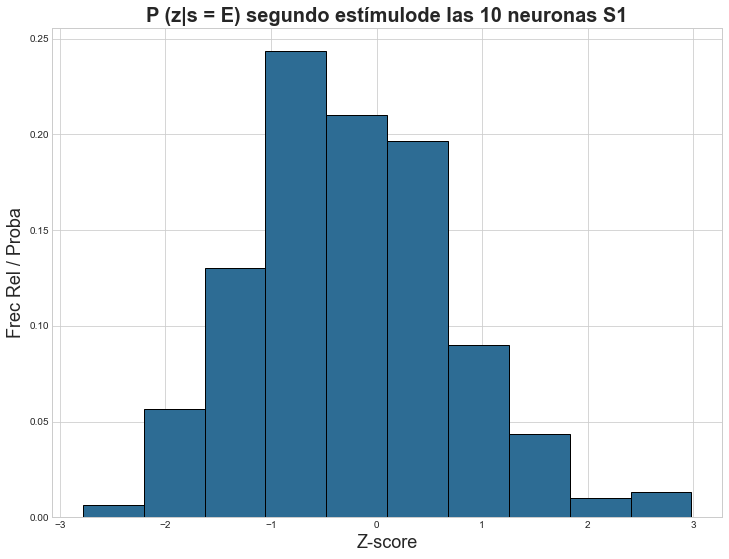

In [16]:
Histograma_Estimulo_Agrupado(Zs_2,case=4,tit="P (z|s = E) segundo estímulo",colores="#2d6c94",nombre = 'z_score_seg_extendido')

<h3> Ejercicio 7. </h3>

De nuevo, utiliza las diez neuronas de S1. Agrupe los ensayos según la
identidad del primer o segundo estímulo (agrupado o extendido), similar a como se
hizo en el ejercicio anterior. Calcula la tasa de disparo con dos tipos de ventana: 50ms
con pasos de 10ms; y 200ms con pasos de 50ms. Con ambas tasas, calcula el valor medio
y el σ para cada ventana de tiempo y neurona, de acuerdo a la identidad de los estímulos.

(a) Graficar el factor de Fano ($ \sigma^{2}/<r> $) durante el periodo alrededor del primer estímulo
(de -0.5s a 1.5s) para los dos tipos de primer estímulo (agrupado o extendido)

(b) Graficar el factor de Fano ($ \sigma^{2}/<r> $) durante el periodo alrededor del segundo estímulo
(de 2.5 s a 4.5 s) para los dos tipos de segundo estímulo (agrupado o extendido).

(c) Discute las diferencias que observas entre puntos a) y b) según el tipo de ventana.
    

In [17]:
neu_s1_0 = separar_por_clase(neu_s1_0)
neu_s1a = separar_por_clase(neu_s1a)
neu_s1b = separar_por_clase(neu_s1b)
neu_s1c = separar_por_clase(neu_s1c)
neu_s1d = separar_por_clase(neu_s1d)
neu_s1e = separar_por_clase(neu_s1e)
neu_s1f = separar_por_clase(neu_s1f)
neu_s1g = separar_por_clase(neu_s1g)
neu_s1h = separar_por_clase(neu_s1h)
neu_s1i = separar_por_clase(neu_s1i)

In [18]:
#Utilizando el módulo de lectura de archivo , leemos los .csv y regresamos los índices de los renglones vacíos 
#y un arreglo que contiene los renglones del archivo .csv 
vacios_0,neu_s1_0 = lectArchivo.lectura_archivo('Practica1_Estadistica/TiemposNeuS1.csv')
vacios_a,neu_s1a = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1A.csv')
vacios_b,neu_s1b = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1B.csv')
vacios_c,neu_s1c = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1C.csv')
vacios_d,neu_s1d = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1D.csv')
vacios_e,neu_s1e = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1E.csv')
vacios_f,neu_s1f = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1F.csv')
vacios_g,neu_s1g = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1G.csv')
vacios_h,neu_s1h = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1H.csv')
vacios_i,neu_s1i = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1I.csv')

In [19]:
#Separamos los dos estímulos que se encuentran en los rangos de 0->1 y de 3->4
def Separa_estimulos(espiga,num_estimulo):
    neurona = copy.deepcopy(espiga)
    
    for i in range(len(neurona)): 
            for j in range(len(neurona[i])): #recorre cada condición de cada ensayo 
             
                if num_estimulo == 1:  #Se selecciona si se trata del primer o segundo estímulo 
                    neurona[i][j]=list(filter(lambda x: x>=-0.5 and x<=1.5, neurona[i][j]))
                elif num_estimulo == 2:
                    neurona[i][j]=list(filter(lambda x: x>=2.5 and x<=4.5, neurona[i][j])) #utilizamos fun anon. lambda
                    
                neurona[i][j]=np.array(neurona[i][j])
    
    return neurona

In [21]:
#sep_neu_s1_01 = Separa_estimulos(neu_s1_0,num_estimulo = 1)
#sep_neu_s1_02 = Separa_estimulos(neu_s1_0,num_estimulo = 2)

In [22]:
def bloques_tasa_tiempos(neu_det,paso,vent,inicio,fin):
    
    bloq_1 = neu_det[:15]
    bloq_2 = neu_det[15:30]
    bloq_3 = neu_det[30:45]
    bloq_4 = neu_det[45:60] 
    
    bloque1_det = np.array(bloq_1,dtype='object')
    bloque2_det = np.array(bloq_2,dtype='object')
    bloque3_det = np.array(bloq_3,dtype='object')
    bloque4_det = np.array(bloq_4,dtype='object')

    tasa_eventos_1, tasa_disparo_1 = Cdisparo.tasa_optimizada(inicio,fin,paso,vent,bloque1_det,len(bloq_1),4)
    tasa_eventos_2, tasa_disparo_2 = Cdisparo.tasa_optimizada(inicio,fin,paso,vent,bloque2_det,len(bloq_2),4)
    tasa_eventos_3, tasa_disparo_3 = Cdisparo.tasa_optimizada(inicio,fin,paso,vent,bloque3_det,len(bloq_3),4)
    tasa_eventos_4, tasa_disparo_4 = Cdisparo.tasa_optimizada(inicio,fin,paso,vent,bloque4_det,len(bloq_4),4)
    
    TotalEventos = np.vstack([tasa_eventos_1,tasa_eventos_2,tasa_eventos_3,tasa_eventos_4])
    
    return TotalEventos

In [24]:
#prueba1 = bloques_tasa_tiempos(sep_neu_s1_01,0.01,0.05,-0.5,1.5)

In [25]:
def Tasas_estimulo_separado(espigas,case):
    
    tiempos = np.arange(-2,8,paso)
    tot_ensayos = 60
    Tasa_disp = []
    clase1 = Tasa_disp[:15]
    clase2 = Tasa_disp[15:30]
    clase3 = Tasa_disp[30:45]
    clase4 = Tasa_disp[45:60]
    
    for i in range(len(espigas)): #recore a c/u de las 10 neuronas 
        
        espigas[i] = espigas[i].reshape(tot_ensayos,) #acomodamos de acuerdo al num de ensayos 
        #Matrices vacías que almacenan la tasa de disparo y z-score
        Tasa = np.empty((tot_ensayos,),dtype = float)
        
        for j in range(len(espigas[i])): # ciclo de los 60 ensayos 
            
            espigas[i][j] = np.array([espigas[i][j]])  #matriz
            x,y = np.shape(espigas[i][j]) 
            espigas[i][j]=espigas[i][j].reshape(y,) #reacomodar 
            Tasa[j]=float(len(espigas[i][j])) #cálculo de tasa
        
        Tasa_disp.append(Tasa) #guardar    
        
    if case==1:
        estimulo=np.hstack([clase1,clase2])#agrupados del estímulo 1
    elif case==2:
        estimulo=np.hstack([clase3,clase4])#extendidos del estímulo 1
    elif case==3:
        estimulo=np.hstack([clase1,clase3])#agrupados del estímulo 2
    elif case==4:
        estimulo=np.hstack([clase2,clase4])#extendidos del estímulo 2

In [26]:
#Utilizando el módulo de lectura de archivo , leemos los .csv y regresamos los índices de los renglones vacíos 
#y un arreglo que contiene los renglones del archivo .csv 
vacios_0,neu_s1_0 = lectArchivo.lectura_archivo('Practica1_Estadistica/TiemposNeuS1.csv')
vacios_a,neu_s1a = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1A.csv')
vacios_b,neu_s1b = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1B.csv')
vacios_c,neu_s1c = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1C.csv')
vacios_d,neu_s1d = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1D.csv')
vacios_e,neu_s1e = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1E.csv')
vacios_f,neu_s1f = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1F.csv')
vacios_g,neu_s1g = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1G.csv')
vacios_h,neu_s1h = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1H.csv')
vacios_i,neu_s1i = lectArchivo.lectura_archivo('Practica2_Estadistica/TiemposNeuS1I.csv')